# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [2]:
%matplotlib inline

import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
mnist = tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

In [4]:
(x_train, y_train), (x_test, y_test)=mnist

In [5]:
print(x_train.shape)

(60000, 28, 28)


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

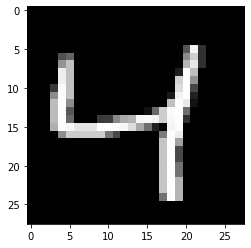

In [6]:
img = x_train[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [7]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder('float32',[None,784])
targets_ = tf.placeholder('float',[None,784]) 

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs=inputs_,units=encoding_dim,activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded,784)
# Sigmoid output from logits
decoded = tf.math.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


## Training

In [8]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [9]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(x_train.shape[0]//batch_size):
        batch = (x_train[ii*(batch_size):(ii+1)*batch_size].reshape(-1,784))/255
        feed = {inputs_: batch, targets_: batch}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6923
Epoch: 1/20... Training loss: 0.6892
Epoch: 1/20... Training loss: 0.6857
Epoch: 1/20... Training loss: 0.6810
Epoch: 1/20... Training loss: 0.6759
Epoch: 1/20... Training loss: 0.6715
Epoch: 1/20... Training loss: 0.6593
Epoch: 1/20... Training loss: 0.6553
Epoch: 1/20... Training loss: 0.6466
Epoch: 1/20... Training loss: 0.6325
Epoch: 1/20... Training loss: 0.6189
Epoch: 1/20... Training loss: 0.6076
Epoch: 1/20... Training loss: 0.5901
Epoch: 1/20... Training loss: 0.5785
Epoch: 1/20... Training loss: 0.5604
Epoch: 1/20... Training loss: 0.5447
Epoch: 1/20... Training loss: 0.5283
Epoch: 1/20... Training loss: 0.5153
Epoch: 1/20... Training loss: 0.4927
Epoch: 1/20... Training loss: 0.4709
Epoch: 1/20... Training loss: 0.4537
Epoch: 1/20... Training loss: 0.4359
Epoch: 1/20... Training loss: 0.4244
Epoch: 1/20... Training loss: 0.4182
Epoch: 1/20... Training loss: 0.4010
Epoch: 1/20... Training loss: 0.3850
Epoch: 1/20... Training loss: 0.3731
E

Epoch: 1/20... Training loss: 0.2082
Epoch: 1/20... Training loss: 0.2095
Epoch: 1/20... Training loss: 0.2062
Epoch: 1/20... Training loss: 0.2103
Epoch: 1/20... Training loss: 0.2060
Epoch: 1/20... Training loss: 0.2086
Epoch: 1/20... Training loss: 0.2075
Epoch: 1/20... Training loss: 0.1987
Epoch: 1/20... Training loss: 0.2025
Epoch: 1/20... Training loss: 0.2127
Epoch: 1/20... Training loss: 0.2235
Epoch: 1/20... Training loss: 0.2001
Epoch: 1/20... Training loss: 0.2088
Epoch: 1/20... Training loss: 0.2090
Epoch: 1/20... Training loss: 0.2110
Epoch: 1/20... Training loss: 0.2024
Epoch: 1/20... Training loss: 0.1987
Epoch: 1/20... Training loss: 0.2153
Epoch: 1/20... Training loss: 0.2059
Epoch: 1/20... Training loss: 0.2152
Epoch: 1/20... Training loss: 0.2054
Epoch: 1/20... Training loss: 0.2072
Epoch: 1/20... Training loss: 0.1917
Epoch: 1/20... Training loss: 0.2032
Epoch: 1/20... Training loss: 0.2037
Epoch: 1/20... Training loss: 0.1996
Epoch: 1/20... Training loss: 0.1895
E

Epoch: 2/20... Training loss: 0.1720
Epoch: 2/20... Training loss: 0.1702
Epoch: 2/20... Training loss: 0.1728
Epoch: 2/20... Training loss: 0.1812
Epoch: 2/20... Training loss: 0.1670
Epoch: 2/20... Training loss: 0.1705
Epoch: 2/20... Training loss: 0.1771
Epoch: 2/20... Training loss: 0.1783
Epoch: 2/20... Training loss: 0.1719
Epoch: 2/20... Training loss: 0.1612
Epoch: 2/20... Training loss: 0.1750
Epoch: 2/20... Training loss: 0.1721
Epoch: 2/20... Training loss: 0.1683
Epoch: 2/20... Training loss: 0.1619
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1648
Epoch: 2/20... Training loss: 0.1657
Epoch: 2/20... Training loss: 0.1710
Epoch: 2/20... Training loss: 0.1687
Epoch: 2/20... Training loss: 0.1654
Epoch: 2/20... Training loss: 0.1695
Epoch: 2/20... Training loss: 0.1672
Epoch: 2/20... Training loss: 0.1708
Epoch: 2/20... Training loss: 0.1658
Epoch: 2/20... Training loss: 0.1746
Epoch: 2/20... Training loss: 0.1786
Epoch: 2/20... Training loss: 0.1727
E

Epoch: 3/20... Training loss: 0.1466
Epoch: 3/20... Training loss: 0.1441
Epoch: 3/20... Training loss: 0.1666
Epoch: 3/20... Training loss: 0.1499
Epoch: 3/20... Training loss: 0.1512
Epoch: 3/20... Training loss: 0.1530
Epoch: 3/20... Training loss: 0.1491
Epoch: 3/20... Training loss: 0.1539
Epoch: 3/20... Training loss: 0.1442
Epoch: 3/20... Training loss: 0.1471
Epoch: 3/20... Training loss: 0.1546
Epoch: 3/20... Training loss: 0.1518
Epoch: 3/20... Training loss: 0.1340
Epoch: 3/20... Training loss: 0.1449
Epoch: 3/20... Training loss: 0.1576
Epoch: 3/20... Training loss: 0.1450
Epoch: 3/20... Training loss: 0.1386
Epoch: 3/20... Training loss: 0.1463
Epoch: 3/20... Training loss: 0.1543
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1428
Epoch: 3/20... Training loss: 0.1472
Epoch: 3/20... Training loss: 0.1416
Epoch: 3/20... Training loss: 0.1407
Epoch: 3/20... Training loss: 0.1474
Epoch: 3/20... Training loss: 0.1509
Epoch: 3/20... Training loss: 0.1407
E

Epoch: 4/20... Training loss: 0.1365
Epoch: 4/20... Training loss: 0.1351
Epoch: 4/20... Training loss: 0.1362
Epoch: 4/20... Training loss: 0.1338
Epoch: 4/20... Training loss: 0.1328
Epoch: 4/20... Training loss: 0.1436
Epoch: 4/20... Training loss: 0.1411
Epoch: 4/20... Training loss: 0.1282
Epoch: 4/20... Training loss: 0.1328
Epoch: 4/20... Training loss: 0.1350
Epoch: 4/20... Training loss: 0.1386
Epoch: 4/20... Training loss: 0.1354
Epoch: 4/20... Training loss: 0.1344
Epoch: 4/20... Training loss: 0.1290
Epoch: 4/20... Training loss: 0.1623
Epoch: 4/20... Training loss: 0.1302
Epoch: 4/20... Training loss: 0.1348
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1271
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1273
Epoch: 4/20... Training loss: 0.1257
Epoch: 4/20... Training loss: 0.1265
Epoch: 4/20... Training loss: 0.1278
Epoch: 4/20... Training loss: 0.1357
Epoch: 4/20... Training loss: 0.1404
Epoch: 4/20... Training loss: 0.1413
E

Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1308
Epoch: 4/20... Training loss: 0.1279
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1179
Epoch: 4/20... Training loss: 0.1288
Epoch: 4/20... Training loss: 0.1189
Epoch: 4/20... Training loss: 0.1467
Epoch: 4/20... Training loss: 0.1434
Epoch: 4/20... Training loss: 0.1197
Epoch: 4/20... Training loss: 0.1211
Epoch: 5/20... Training loss: 0.1191
Epoch: 5/20... Training loss: 0.1165
Epoch: 5/20... Training loss: 0.1275
Epoch: 5/20... Training loss: 0.1238
Epoch: 5/20... Training loss: 0.1221
Epoch: 5/20... Training loss: 0.1299
Epoch: 5/20... Training loss: 0.1324
Epoch: 5/20... Training loss: 0.1280
Epoch: 5/20... Training loss: 0.1227
Epoch: 5/20... Training loss: 0.1200
Epoch: 5/20... Training loss: 0.1164
Epoch: 5/20... Training loss: 0.1232
Epoch: 5/20... Training loss: 0.1215
Epoch: 5/20... Training loss: 0.1256
E

Epoch: 5/20... Training loss: 0.1193
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1206
Epoch: 5/20... Training loss: 0.1230
Epoch: 5/20... Training loss: 0.1262
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1165
Epoch: 5/20... Training loss: 0.1184
Epoch: 5/20... Training loss: 0.1189
Epoch: 5/20... Training loss: 0.1181
Epoch: 5/20... Training loss: 0.1174
Epoch: 5/20... Training loss: 0.1291
Epoch: 5/20... Training loss: 0.1219
Epoch: 5/20... Training loss: 0.1270
Epoch: 5/20... Training loss: 0.1221
Epoch: 5/20... Training loss: 0.1213
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1189
Epoch: 5/20... Training loss: 0.1190
Epoch: 5/20... Training loss: 0.1201
Epoch: 5/20... Training loss: 0.1162
Epoch: 5/20... Training loss: 0.1169
Epoch: 5/20... Training loss: 0.1174
Epoch: 5/20... Training loss: 0.1189
Epoch: 5/20... Training loss: 0.1182
Epoch: 5/20... Training loss: 0.1181
Epoch: 5/20... Training loss: 0.1224
E

Epoch: 6/20... Training loss: 0.1176
Epoch: 6/20... Training loss: 0.1098
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1117
Epoch: 6/20... Training loss: 0.1107
Epoch: 6/20... Training loss: 0.1119
Epoch: 6/20... Training loss: 0.1137
Epoch: 6/20... Training loss: 0.1105
Epoch: 6/20... Training loss: 0.1150
Epoch: 6/20... Training loss: 0.1108
Epoch: 6/20... Training loss: 0.1130
Epoch: 6/20... Training loss: 0.1109
Epoch: 6/20... Training loss: 0.1179
Epoch: 6/20... Training loss: 0.1212
Epoch: 6/20... Training loss: 0.1164
Epoch: 6/20... Training loss: 0.1181
Epoch: 6/20... Training loss: 0.1168
Epoch: 6/20... Training loss: 0.1094
Epoch: 6/20... Training loss: 0.1098
Epoch: 6/20... Training loss: 0.1108
Epoch: 6/20... Training loss: 0.1223
Epoch: 6/20... Training loss: 0.1213
Epoch: 6/20... Training loss: 0.1163
Epoch: 6/20... Training loss: 0.1148
Epoch: 6/20... Training loss: 0.1156
Epoch: 6/20... Training loss: 0.1104
Epoch: 6/20... Training loss: 0.1168
E

Epoch: 7/20... Training loss: 0.1219
Epoch: 7/20... Training loss: 0.1118
Epoch: 7/20... Training loss: 0.1101
Epoch: 7/20... Training loss: 0.1113
Epoch: 7/20... Training loss: 0.1074
Epoch: 7/20... Training loss: 0.1094
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1090
Epoch: 7/20... Training loss: 0.1185
Epoch: 7/20... Training loss: 0.1145
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.1059
Epoch: 7/20... Training loss: 0.1151
Epoch: 7/20... Training loss: 0.1067
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1081
Epoch: 7/20... Training loss: 0.1156
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1063
Epoch: 7/20... Training loss: 0.1101
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1053
Epoch: 7/20... Training loss: 0.1090
Epoch: 7/20... Training loss: 0.1106
Epoch: 7/20... Training loss: 0.1056
Epoch: 7/20... Training loss: 0.1163
Epoch: 7/20... Training loss: 0.1129
E

Epoch: 8/20... Training loss: 0.1095
Epoch: 8/20... Training loss: 0.1079
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.1085
Epoch: 8/20... Training loss: 0.1093
Epoch: 8/20... Training loss: 0.1120
Epoch: 8/20... Training loss: 0.1100
Epoch: 8/20... Training loss: 0.1102
Epoch: 8/20... Training loss: 0.1027
Epoch: 8/20... Training loss: 0.1126
Epoch: 8/20... Training loss: 0.1030
Epoch: 8/20... Training loss: 0.1068
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.1017
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.1060
Epoch: 8/20... Training loss: 0.1082
Epoch: 8/20... Training loss: 0.1114
Epoch: 8/20... Training loss: 0.1094
Epoch: 8/20... Training loss: 0.1059
Epoch: 8/20... Training loss: 0.1081
Epoch: 8/20... Training loss: 0.1037
Epoch: 8/20... Training loss: 0.1055
E

Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.1072
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.1028
Epoch: 8/20... Training loss: 0.1061
Epoch: 8/20... Training loss: 0.1062
Epoch: 8/20... Training loss: 0.1043
Epoch: 8/20... Training loss: 0.1070
Epoch: 8/20... Training loss: 0.1051
Epoch: 8/20... Training loss: 0.1051
Epoch: 8/20... Training loss: 0.1020
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.1082
Epoch: 8/20... Training loss: 0.1016
Epoch: 8/20... Training loss: 0.1115
Epoch: 8/20... Training loss: 0.1063
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.1019
Epoch: 9/20... Training loss: 0.1015
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.1067
Epoch: 9/20... Training loss: 0.1033
Epoch: 9/20... Training loss: 0.1021
Epoch: 9/20... Training loss: 0.1060
Epoch: 9/20... Training loss: 0.1058
Epoch: 9/20... Training loss: 0.1070
E

Epoch: 9/20... Training loss: 0.1024
Epoch: 9/20... Training loss: 0.1035
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.1036
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.1035
Epoch: 9/20... Training loss: 0.1097
Epoch: 9/20... Training loss: 0.1047
Epoch: 9/20... Training loss: 0.1004
Epoch: 9/20... Training loss: 0.1023
Epoch: 9/20... Training loss: 0.1049
Epoch: 9/20... Training loss: 0.1003
Epoch: 9/20... Training loss: 0.1034
Epoch: 9/20... Training loss: 0.1063
Epoch: 9/20... Training loss: 0.1042
Epoch: 9/20... Training loss: 0.1062
Epoch: 9/20... Training loss: 0.1051
Epoch: 9/20... Training loss: 0.1080
Epoch: 9/20... Training loss: 0.1030
Epoch: 9/20... Training loss: 0.1036
Epoch: 9/20... Training loss: 0.1024
Epoch: 9/20... Training loss: 0.0995
Epoch: 9/20... Training loss: 0.1027
Epoch: 9/20... Training loss: 0.1064
Epoch: 9/20... Training loss: 0.1071
Epoch: 9/20... Training loss: 0.0965
E

Epoch: 10/20... Training loss: 0.1011
Epoch: 10/20... Training loss: 0.0993
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0983
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0991
Epoch: 10/20... Training loss: 0.1062
Epoch: 10/20... Training loss: 0.1113
Epoch: 10/20... Training loss: 0.1005
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0995
Epoch: 10/20... Training loss: 0.0990
Epoch: 10/20... Training loss: 0.1021
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.1026
Epoch: 10/20... Training loss: 0.1036
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.1014
Epoch: 10/20... Training loss: 0.1004
Epoch: 10/20... Training loss: 0.1029
Epoch: 10/20... Training loss: 0.1077
Epoch: 10/20... Training loss: 0.0996
Epoch: 10/20... Training loss: 0.1018
Epoch: 10/20... Training loss: 0.1004
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.1031
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0920
Epoch: 11/20... Training loss: 0.0991
Epoch: 11/20... Training loss: 0.1007
Epoch: 11/20... Training loss: 0.1042
Epoch: 11/20... Training loss: 0.1024
Epoch: 11/20... Training loss: 0.0986
Epoch: 11/20... Training loss: 0.1006
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0986
Epoch: 11/20... Training loss: 0.1037
Epoch: 11/20... Training loss: 0.0989
Epoch: 11/20... Training loss: 0.0984
Epoch: 11/20... Training loss: 0.1017
Epoch: 11/20... Training loss: 0.1070
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0990
Epoch: 11/20... Training loss: 0.0989
Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20... Training loss: 0.1065
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0980
Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.1003
Epoch: 11/20... Training loss: 0.1026
Epoch: 11/20... Training loss: 0.0997
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.1007
Epoch: 11/20... Training loss: 0.1005
Epoch: 11/20... Training loss: 0.0987
Epoch: 11/20... Training loss: 0.1009
Epoch: 11/20... Training loss: 0.0996
Epoch: 11/20... Training loss: 0.1001
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.1033
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.1031
Epoch: 11/20... Training loss: 0.0981
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.1003
Epoch: 12/20... Training loss: 0.0979
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.1004
Epoch: 12/20... Training loss: 0.0977
Epoch: 12/20... Training loss: 0.1012
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0982
Epoch: 12/20... Training loss: 0.0975
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0990
Epoch: 12/20... Training loss: 0.1055
Epoch: 12/20... Training loss: 0.0992
Epoch: 12/20... Training loss: 0.0984
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0894
Epoch: 12/20... Training loss: 0.0981
Epoch: 12/20... Training loss: 0.0987
Epoch: 12/20... Training loss: 0.0980
Epoch: 12/20... Training loss: 0.0990
Epoch: 12/20... Training loss: 0.0914
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0983
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0997
Epoch: 12/20... Training loss: 0.1053
Epoch: 12/20... Training loss: 0.0999
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0980
Epoch: 12/20... Training loss: 0.0994
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0990
Epoch: 12/20... Training loss: 0.1020
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0882
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0973
Epoch: 13/20... Training loss: 0.0910
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0973
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.1035
Epoch: 13/20... Training loss: 0.1001
Epoch: 13/20... Training loss: 0.0986
Epoch: 13/20... Training loss: 0.0975
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0890
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.1004
Epoch: 13/20... Training loss: 0.1063
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0900
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0983
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0900
Epoch: 14/20... Training loss: 0.0894
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0979
Epoch: 14/20... Training loss: 0.1010
Epoch: 14/20... Training loss: 0.0989
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0984
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0994
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0983
Epoch: 14/20... Training loss: 0.1027
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.1034
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0893
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0974
Epoch: 14/20... Training loss: 0.0993
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0999
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0973
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0988
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0986
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0902
Epoch: 15/20... Training loss: 0.0902
Epoch: 15/20... Training loss: 0.0971
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0975
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0993
Epoch: 15/20... Training loss: 0.0890
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.1013
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0989
Epoch: 15/20... Training loss: 0.1008
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0997
Epoch: 15/20... Training loss: 0.1001
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0901
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.1022
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.1024
Epoch: 15/20... Training loss: 0.0989
Epoch: 15/20... Training loss: 0.0980
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0976
Epoch: 15/20... Training loss: 0.0979
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0899
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20

Epoch: 16/20... Training loss: 0.1022
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0979
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0972
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0878
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0988
Epoch: 16/20... Training loss: 0.0982
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0982
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0975
Epoch: 17/20... Training loss: 0.0893
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0972
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0905
Epoch: 17/20... Training loss: 0.0897
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0987
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0894
Epoch: 17/20... Training loss: 0.1046
Epoch: 17/20... Training loss: 0.0975
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0893
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.1008
Epoch: 17/20... Training loss: 0.0991
Epoch: 17/20... Training loss: 0.0864
Epoch: 17/20... Training loss: 0.0905
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0870
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0965
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.1008
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0879
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0898
Epoch: 18/20... Training loss: 0.0962
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0975
Epoch: 18/20... Training loss: 0.0973
Epoch: 18/20... Training loss: 0.0965
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0981
Epoch: 18/20... Training loss: 0.0971
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0973
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0893
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0975
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0984
Epoch: 18/20... Training loss: 0.0897
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0984
Epoch: 18/20... Training loss: 0.0996
Epoch: 18/20... Training loss: 0.0974
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0876
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0903
Epoch: 19/20... Training loss: 0.0872
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0982
Epoch: 19/20... Training loss: 0.0973
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0975
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0877
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0999
Epoch: 19/20... Training loss: 0.0991
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0975
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0966
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0901
Epoch: 20/20... Training loss: 0.0893
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0981
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0891
Epoch: 20/20... Training loss: 0.1036
Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0888
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.1002
Epoch: 20/20... Training loss: 0.0986
Epoch: 20/20... Training loss: 0.0860
Epoch: 20/20... Training loss: 0.0900
Epoch: 20/20... Training loss: 0.0987
Epoch: 20/20... Training loss: 0.0898
Epoch: 20/20... Training loss: 0.0871
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

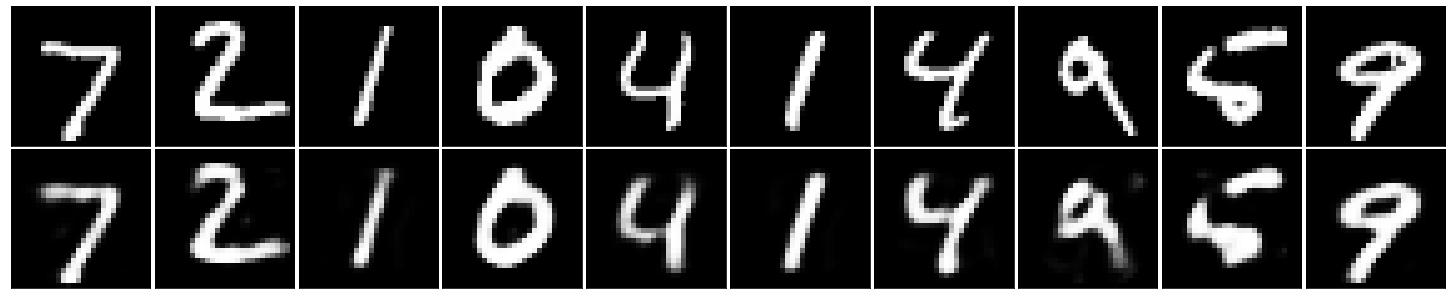

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = x_test[:10].reshape(-1,784)/255
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [11]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.